# Phase 2 - Week 1 - Day 1 PM - Artificial Neural Network (ANN) - Binary Classification

> **NOTES**

> Before you run the notebook below, **it is recommended to run the program using the GPU** so that the training process doesn't take too long.
> If you use Google Colab, then you can set it by following the steps: `Runtime` >> `Change runtime type` >> `T4 GPU`.

# A. Binary Classification

## A.1 - Import Libraries & Data Loading

In the first tutorial, we will implement Binary Classification using Titanic dataset to build neural network models.

The purpose of this notebook is to demonstrate the creation of an ANN model in a general sense, so some details such as EDA, handling outliers, checking types of missing values, etc., are omitted.

In reality, you should consider these aspects for the project you are working on so that your ANN model is an optimal model.

In [ ]:
# Downgrade version of TensorFlow and tf-keras

!pip install -q --upgrade "tensorflow<2.16" "tf-keras<2.16"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.6 MB/s eta 0:00:00


In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report

In [ ]:
# Load the Titanic dataset

url = 'https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D3AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Titanic.csv'
data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## A.2 - Feature Engineering

### A.2.1 - Data Splitting

In [ ]:
# Splitting between `X` and `y`

X = data.drop('Survived', axis=1)
y = data['Survived']

In [ ]:
# Splitting between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (643, 11)
Val Size   :  (114, 11)
Test Size  :  (134, 11)


### A.2.2 - Handling Missing Values

In [ ]:
# Check Missing Values on X_train

X_train.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,131
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,497


In [ ]:
# Check Missing Values on X_val

X_val.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,22
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,94


In [ ]:
# Check Missing Values on X_test

X_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,24
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,96


We will impute this missing values in Pipeline using median imputation.

### A.2.3 - Feature Selection

Let's assume columns `PassengerId`, `Cabin`, `Ticket`, `Embarked`, and `Name` do not have strong correlations against the target (column `Survived`).

In [ ]:
# Drop Columns

X_train.drop(['PassengerId', 'Cabin', 'Ticket', 'Embarked', 'Name'], axis=1, inplace=True)
X_val.drop(['PassengerId', 'Cabin', 'Ticket', 'Embarked', 'Name'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Cabin', 'Ticket', 'Embarked', 'Name'], axis=1, inplace=True)

X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
868,3,male,NaN,0,0,9.5000
223,3,male,NaN,0,0,7.8958
846,3,male,NaN,8,2,69.5500
171,3,male,4.0,4,1,29.1250
435,1,female,14.0,1,2,120.0000
...,...,...,...,...,...,...
533,3,female,NaN,0,2,22.3583
302,3,male,19.0,0,0,0.0000
473,2,female,23.0,0,0,13.7917
283,3,male,19.0,0,0,8.0500


### A.2.4 - Pipeline

In [ ]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Columns :  ['Sex']


In [ ]:
# Create A Pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [ ]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape

(643, 7)

# A.3 - Sequential API

## A.3.1 - Model Definition

In [ ]:
# Clear session

import tensorflow as tf
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Create Sequential API

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_sequential = Sequential()
model_sequential.add(Dense(16,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(7,)))
model_sequential.add(Dense(8,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 273 (1.07 KB)
Trainable params: 273 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


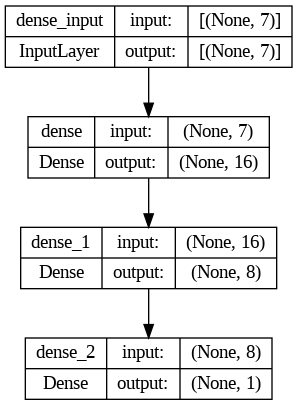

In [ ]:
# Plot layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

## A.3.2 - Model Training

In [ ]:
# Train the model

%%time

history_sequential = model_sequential.fit(X_train,
                                          y_train,
                                          epochs=20,
                                          validation_data=(X_val, y_val),
                                          batch_size=10)

Epoch 1/20
65/65 [==============================] - 2s 8ms/step - loss: 0.8321 - accuracy: 0.4541 - val_loss: 0.7100 - val_accuracy: 0.4561
Epoch 2/20
65/65 [==============================] - 0s 5ms/step - loss: 0.6695 - accuracy: 0.5925 - val_loss: 0.6356 - val_accuracy: 0.5877
Epoch 3/20
65/65 [==============================] - 0s 5ms/step - loss: 0.6027 - accuracy: 0.6656 - val_loss: 0.5930 - val_accuracy: 0.6491
Epoch 4/20
65/65 [==============================] - 0s 5ms/step - loss: 0.5610 - accuracy: 0.7201 - val_loss: 0.5565 - val_accuracy: 0.6754
Epoch 5/20
65/65 [==============================] - 0s 7ms/step - loss: 0.5287 - accuracy: 0.7543 - val_loss: 0.5222 - val_accuracy: 0.7807
Epoch 6/20
65/65 [==============================] - 0s 6ms/step - loss: 0.5023 - accuracy: 0.7807 - val_loss: 0.4905 - val_accuracy: 0.7982
Epoch 7/20
65/65 [==============================] - 1s 9ms/step - loss: 0.4815 - accuracy: 0.7963 - val_loss: 0.4674 - val_accuracy: 0.8070
Epoch 8/20
65/65 [==

## A.3.3 - Model Evaluation

Text(0.5, 1.0, 'Grafik Acc vs Val-Acc')

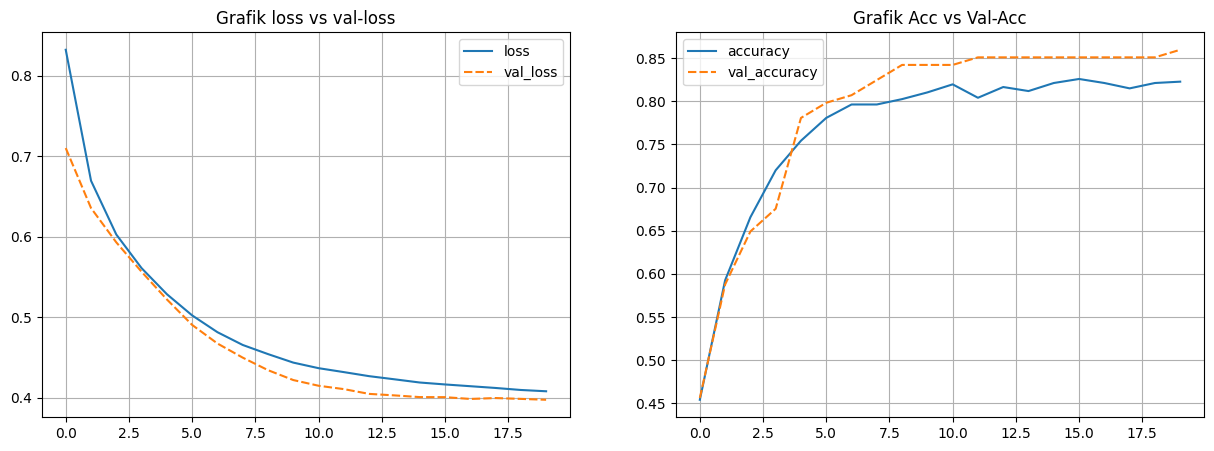

In [ ]:
# Plot training result

history_sequential_df = pd.DataFrame(history_sequential.history)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_sequential_df[['loss', 'val_loss']])
plt.grid()
plt.title('Grafik loss vs val-loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_sequential_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Grafik Acc vs Val-Acc')

In [ ]:
# Predict test-set

y_pred_test = model_sequential.predict(X_test)
y_pred_test

5/5 [==============================] - 0s 2ms/step


array([[0.12382917],
       [0.12069283],
       [0.12904468],
       [0.9185033 ],
       [0.5857138 ],
       [0.97652173],
       [0.5852254 ],
       [0.28972214],
       [0.6499943 ],
       [0.98258317],
       [0.33115435],
       [0.05529011],
       [0.21587929],
       [0.08672829],
       [0.11386399],
       [0.9674488 ],
       [0.3024563 ],
       [0.58519477],
       [0.13557073],
       [0.3283293 ],
       [0.10810123],
       [0.31738755],
       [0.5757433 ],
       [0.1296778 ],
       [0.09416477],
       [0.2384284 ],
       [0.26812002],
       [0.12670822],
       [0.3333228 ],
       [0.59533805],
       [0.13498361],
       [0.60431683],
       [0.40057555],
       [0.5853029 ],
       [0.14116003],
       [0.15429783],
       [0.41913015],
       [0.5852254 ],
       [0.9717703 ],
       [0.09159248],
       [0.4081709 ],
       [0.13748337],
       [0.09160424],
       [0.09158134],
       [0.41805407],
       [0.25815004],
       [0.13510591],
       [0.113

In [ ]:
# Model evaluation

y_pred_cls = np.where(y_pred_test >= 0.5, 1, 0)
print(classification_report(y_test, y_pred_cls))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        78
           1       0.80      0.71      0.75        56

    accuracy                           0.81       134
   macro avg       0.80      0.79      0.80       134
weighted avg       0.81      0.81      0.80       134



# A.4 - Functional API

## A.4.1 - Model Definition

In [ ]:
# Clear session

import tensorflow as tf
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Create functional model

from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

input_layer = Input(shape=(7,))
hidden_layer_1 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)) (input_layer)
hidden_layer_2 = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)) (hidden_layer_1)
concat_layer = concatenate([hidden_layer_2, input_layer])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)) (concat_layer)

model_functional = Model(inputs = input_layer, outputs = output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 7)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 16)                   128       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 8)                    136       ['dense[0][0]']               
                                                                                                  
 concatenate (Concatenate)   (None, 15)                   0         ['dense_1[0][0]',             
                                                                     'input_1[0][0]']         

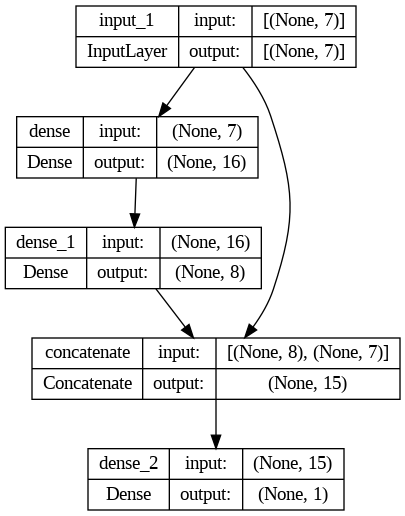

In [ ]:
# Plot layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

## A.4.2 - Model Training

In [ ]:
# Train the model

%%time
history_functional = model_functional.fit(X_train,
                                          y_train,
                                          epochs=20,
                                          validation_data=(X_val, y_val),
                                          batch_size=10)

Epoch 1/20
65/65 [==============================] - 4s 11ms/step - loss: 0.9081 - accuracy: 0.4666 - val_loss: 0.8612 - val_accuracy: 0.5000
Epoch 2/20
65/65 [==============================] - 0s 8ms/step - loss: 0.7455 - accuracy: 0.6159 - val_loss: 0.7669 - val_accuracy: 0.5702
Epoch 3/20
65/65 [==============================] - 0s 7ms/step - loss: 0.6704 - accuracy: 0.6672 - val_loss: 0.7069 - val_accuracy: 0.6140
Epoch 4/20
65/65 [==============================] - 1s 8ms/step - loss: 0.6212 - accuracy: 0.6983 - val_loss: 0.6495 - val_accuracy: 0.6579
Epoch 5/20
65/65 [==============================] - 1s 8ms/step - loss: 0.5816 - accuracy: 0.7434 - val_loss: 0.5919 - val_accuracy: 0.7281
Epoch 6/20
65/65 [==============================] - 1s 9ms/step - loss: 0.5431 - accuracy: 0.7652 - val_loss: 0.5358 - val_accuracy: 0.7544
Epoch 7/20
65/65 [==============================] - 1s 8ms/step - loss: 0.5072 - accuracy: 0.7714 - val_loss: 0.4839 - val_accuracy: 0.7719
Epoch 8/20
65/65 [=

## A.4.2 - Model Evaluation

Text(0.5, 1.0, 'Grafik Acc vs Val-Acc')

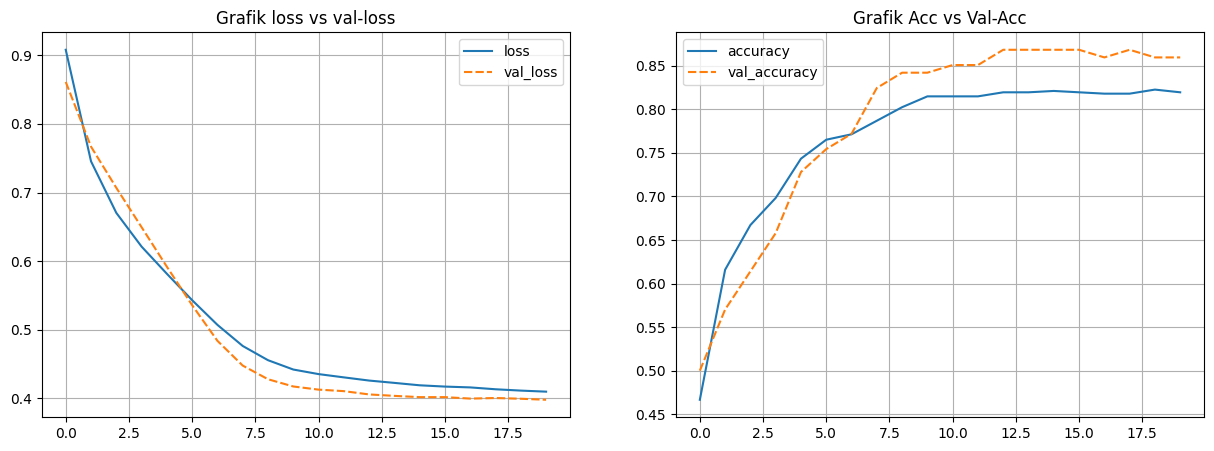

In [ ]:
# Plot training result

history_functional_df = pd.DataFrame(history_functional.history)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_functional_df[['loss', 'val_loss']])
plt.grid()
plt.title('Grafik loss vs val-loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_functional_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Grafik Acc vs Val-Acc')

In [ ]:
# Model Evaluation

y_pred_func = model_functional.predict(X_test)
y_pred_cls = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_cls))

5/5 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        78
           1       0.82      0.73      0.77        56

    accuracy                           0.82       134
   macro avg       0.82      0.81      0.81       134
weighted avg       0.82      0.82      0.82       134



# A.5 - Model Saving

In [ ]:
# Save Pipeline

import pickle

with open('titanic_pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

In [ ]:
# Model summary

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 273 (1.07 KB)
Trainable params: 273 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Freeze model

model_sequential.trainable = False
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 273 (1.07 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 273 (1.07 KB)
_________________________________________________________________


In [ ]:
# Save ANN model

model_sequential.save('titanic_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
